# Statistics using SimpleITK
We can use [SimpleITK](https://simpleitk.readthedocs.io/) for extracting features from 3D label images. For convenience reasons we use the [napari-simpleitk-image-processing](https://github.com/haesleinhuepf/napari-simpleitk-image-processing) library.

In [1]:
import numpy as np
import pandas as pd
from skimage.data import cells3d
import stackview
from skimage import measure
from skimage import filters
import napari_simpleitk_image_processing as nsitk

StackViewNDArray([[[5311, 4458, 5880, ..., 4220, 6497, 4932],
                   [4078, 4552, 3557, ..., 4552, 4884, 5169],
                   [3414, 5074, 4363, ..., 4078, 6117, 5406],
                   ...,
                   [3983, 3983, 2750, ..., 4410, 4600, 5880],
                   [3604, 4173, 4600, ..., 5548, 5690, 4268],
                   [4078, 4268, 4220, ..., 5359, 6686, 7492]],

                  [[4220, 4932, 5074, ..., 6449, 6117, 4932],
                   [3082, 4979, 4505, ..., 4505, 6971, 5880],
                   [4695, 4315, 4695, ..., 4742, 5785, 5074],
                   ...,
                   [3414, 3841, 3462, ..., 5169, 4742, 5027],
                   [4173, 3319, 2798, ..., 5406, 4600, 4837],
                   [3225, 3557, 3651, ..., 5453, 5406, 4837]],

                  [[4552, 4505, 4742, ..., 4458, 4979, 4647],
                   [3367, 4268, 4647, ..., 6402, 6022, 5738],
                   [3509, 3272, 4647, ..., 5264, 4220, 6259],
                   ...,
                   [3841, 3936, 3888, ..., 4884, 5169, 4789],
                   [3604, 3225, 2798, ..., 4552, 6117, 5690],
                   [4126, 4458, 4837, ..., 5928, 6734, 5027]],

                  ...,

                  [[5121, 5833, 5738, ..., 5406, 3983, 4220],
                   [5311, 5453, 5453, ..., 5169, 5027, 4884],
                   [6544, 5121, 5264, ..., 4363, 5406, 4695],
                   ...,
                   [4884, 2324, 3130, ..., 4552, 4979, 6070],
                   [3225, 2513, 2513, ..., 4742, 3035, 2418],
                   [3272, 2798, 3888, ..., 3604, 4268, 3746]],

                  [[5359, 5928, 5738, ..., 4268, 4505, 4031],
                   [7445, 6829, 4268, ..., 4884, 5596, 3082],
                   [6497, 6544, 4932, ..., 3604, 5359, 4410],
                   ...,
                   [5833, 2703, 3367, ..., 3177, 4220, 4220],
                   [4031, 3509, 5216, ..., 4268, 3604, 4932],
                   [3557, 2987, 3936, ..., 3604, 3462, 5264]],

                  [[6402, 6781, 4789, ..., 5928, 6022, 3651],
                   [4363, 4837, 6307, ..., 4315, 3651, 4126],
                   [4979, 4695, 4742, ..., 4789, 4837, 4552],
                   ...,
                   [4078, 2513, 3035, ..., 1849, 3888, 4363],
                   [3936, 3888, 4315, ..., 5216, 4031, 5643],
                   [4173, 4505, 3794, ..., 4979, 6781, 4031]]],
                 dtype=uint16)
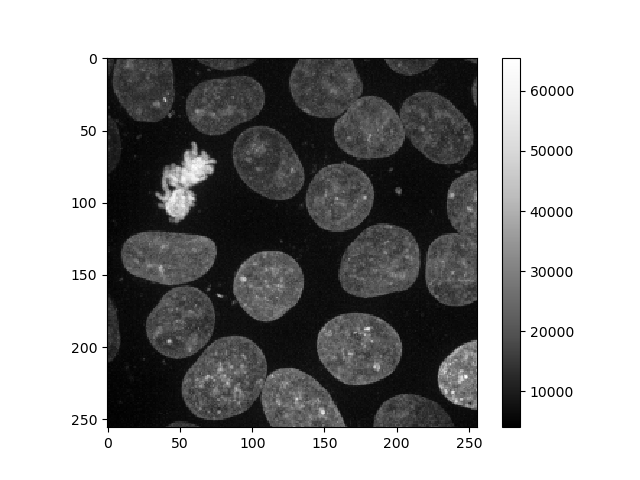
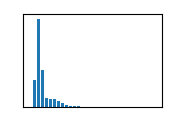

In [2]:
# load image
image = cells3d()[:,1]
stackview.insight(image)

StackViewNDArray([[[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  ...,

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]]])
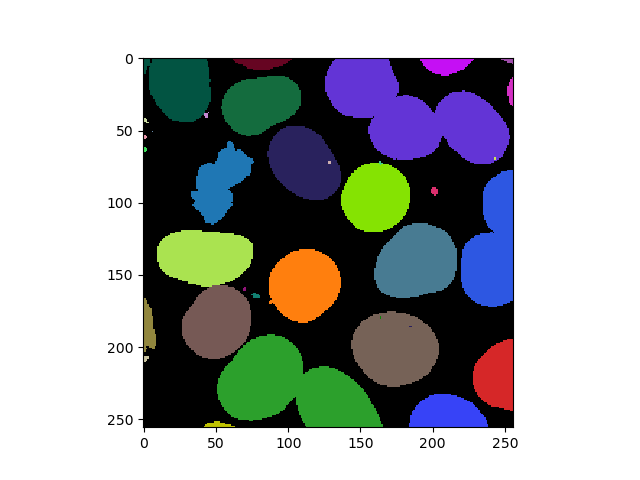

In [3]:
# denoising
blurred_image = filters.gaussian(image, sigma=1)

# binarization
threshold = filters.threshold_otsu(blurred_image)
thresholded_image = blurred_image >= threshold

# labeling
label_image = measure.label(thresholded_image)

# visualization
stackview.insight(label_image)

## Measurements/ region properties

We are now using the very handy function `label_statistics` which provides a table of features. Let us check first what we need to provide for this function:

In [4]:
nsitk.label_statistics?

Signature:
nsitk.label_statistics(
    intensity_image: 'napari.types.ImageData',
    label_image: 'napari.types.LabelsData',
    size: bool = True,
    intensity: bool = True,
    perimeter: bool = False,
    shape: bool = False,
    position: bool = False,
    moments: bool = False,
    napari_viewer: 'napari.Viewer' = None,
) -> 'pandas.DataFrame'
Docstring:
Measure intensity/shape/... statistics per label

Parameters
----------
intensity_image: ndarray, optional
    Can be None
label_image: ndarray
    Must be subsequently labeled
size: bool, optional
intensity: bool, optional
perimeter: bool, optional
shape: bool, optional
position: bool, optional
moments: bool, optional
napari_viewer: napari.Viewer, optional

Returns
-------
pandas DataFrame, in case napari_viewr is None, otherwise the DataFrame will be added to
the passed label_image's layer.features


See Also
--------
..[0] https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1LabelShapeStatisticsImageFilter
..[1] ht

Feature categories which have are set to `True` are measured by default. In this case, the categories are `size` and `intensity`. But the rest might be also interesting to investigate. So we need them to `True` as well:

In [5]:
df = pd.DataFrame(nsitk.label_statistics(image, label_image,  
                              size=True,
                              shape=True, 
                              perimeter=True, 
                              position=True))

df

label  maximum          mean        median  minimum         sigma  \
0       1  65535.0  22623.940316  19071.708984   4126.0  12083.017961   
1       2  47610.0  16500.850114  16255.751953   4837.0   4418.271669   
2       3  55766.0  15183.665955  14463.779297   4932.0   4399.126377   
3       4  65298.0  19238.187210  18559.716797   4458.0   6757.679557   
4       5  36134.0  13131.887959  12927.802734   5453.0   2797.962330   
5       6  34332.0  12687.766570  12415.810547   5833.0   2613.257575   
6       7  41113.0  15498.465402  15231.767578   5643.0   3879.807500   
7       8  42394.0  13376.216498  12927.802734   5880.0   3092.779705   
8       9  55624.0  15445.162122  14975.771484   3983.0   4369.205585   
9      10  45903.0  12296.049111  12159.814453   5169.0   2351.130239   
10     11  34617.0  12775.336218  12415.810547   6022.0   2542.662952   
11     12  39406.0  14132.811306  13695.791016   5596.0   3229.607077   
12     13  39738.0  14336.412193  13951.787109   4837.0   3421.796926   
13     14  32910.0  14267.065307  13951.787109   5027.0   3382.211567   
14     15  25560.0  12693.643645  12159.814453   5975.0   2712.361825   
15     16  23378.0  11729.898405  11647.822266   6971.0   1929.340114   
16     17  21624.0  12051.440492  11903.818359   6829.0   1909.310342   
17     18  18067.0  12642.775056  12671.806641   7113.0   1887.721974   
18     19  18494.0  13171.954545  13183.798828   7777.0   2080.440088   
19     20  12993.0  11074.950000  10879.833984   9626.0    866.009327   
20     21  15412.0  11762.400000  11647.822266   8536.0   1432.674746   
21     22  25607.0  12046.942658  11903.818359   6212.0   1987.248259   
22     23  22667.0  14137.542265  13951.787109   8014.0   2564.794476   
23     24  13278.0  12313.333333  12671.806641  11096.0   1112.726981   
24     25  15933.0  11565.902778  11391.826172   8868.0   1472.300884   
25     26  15933.0  11984.942029  11903.818359   8962.0   1716.507911   
26     27  11333.0  11333.000000  11391.826172  11333.0      0.000000   
27     28  22288.0  15056.166667  14975.771484   9247.0   3374.279528   
28     29  16977.0  14581.750000  16255.751953  11144.0   2606.129234   
29     30  37747.0  16443.567164  13951.787109   6639.0   7418.631290   
30     31  16834.0  14415.500000  16767.744141  11997.0   3420.275501   
31     32  22430.0  15296.428571  16511.748047  10764.0   3278.686644   
32     33  26271.0  15447.663462  15487.763672   8346.0   3648.568557   
33     34  18873.0  15003.800000  14719.775391  12661.0   2099.312522   
34     35  22667.0  15211.444444  14719.775391   7540.0   4278.261961   
35     36  16834.0  14494.666667  14975.771484  12282.0   1758.626130   
36     37  19585.0  19300.500000  19583.701172  19016.0    402.343758   
37     38  14321.0  12139.500000  14207.783203   9958.0   3085.106886   

             sum      variance  bbox_0  bbox_1  ...  \
0   7.471330e+08  1.459993e+08      33      58  ...   
1   6.720961e+08  1.952112e+07      87     133  ...   
2   1.414799e+09  1.935231e+07      51     192  ...   
3   4.229708e+08  4.566623e+07     228     195  ...   
4   1.357010e+09  7.828593e+06     126       0  ...   
5   4.404812e+08  6.829115e+06      86      48  ...   
6   7.140453e+08  1.505291e+07      10     120  ...   
7   4.901982e+08  9.565286e+06      27     158  ...   
8   7.239456e+08  1.908996e+07     144     176  ...   
9   3.923300e+08  5.527813e+06       0       0  ...   
10  4.295962e+08  6.465135e+06      54      13  ...   
11  5.340224e+08  1.043036e+07     137      73  ...   
12  6.751303e+08  1.170869e+07     220      78  ...   
13  6.359402e+08  1.143936e+07     160     115  ...   
14  1.668833e+08  7.356907e+06     184     233  ...   
15  2.794062e+07  3.722353e+06       0     165  ...   
16  4.506034e+07  3.645466e+06      61       0  ...   
17  5.676606e+06  3.563494e+06      42     252  ...   
18  4.346745e+06  4.328231e+06     247       0  ...   
19  2.214990e+05  7.499722e+05       0      41  ...   
2

These are all columns that are available:

In [6]:
print(df.keys())

Index(['label', 'maximum', 'mean', 'median', 'minimum', 'sigma', 'sum',
       'variance', 'bbox_0', 'bbox_1', 'bbox_2', 'bbox_3', 'bbox_4', 'bbox_5',
       'centroid_0', 'centroid_1', 'centroid_2', 'elongation',
       'feret_diameter', 'flatness', 'roundness',
       'equivalent_ellipsoid_diameter_0', 'equivalent_ellipsoid_diameter_1',
       'equivalent_ellipsoid_diameter_2', 'equivalent_spherical_perimeter',
       'equivalent_spherical_radius', 'number_of_pixels',
       'number_of_pixels_on_border', 'perimeter', 'perimeter_on_border',
       'perimeter_on_border_ratio'],
      dtype='object')


In [7]:
df.describe()

label       maximum          mean        median       minimum  \
count  38.000000     38.000000     38.000000     38.000000     38.000000   
mean   19.500000  29249.631579  14141.934960  14012.417763   7860.578947   
std    11.113055  14853.985729   2419.956877   2179.065205   3112.768027   
min     1.000000  11333.000000  11074.950000  10879.833984   3983.000000   
25%    10.250000  17249.500000  12300.370167  12223.813477   5607.750000   
50%    19.500000  23022.500000  14135.176785  13951.787109   7042.000000   
75%    28.750000  38991.250000  15204.499822  14975.771484   9531.250000   
max    38.000000  65535.000000  22623.940316  19583.701172  19016.000000   

              sigma           sum      variance      bbox_0      bbox_1  ...  \
count     38.000000  3.800000e+01  3.800000e+01   38.000000   38.000000  ...   
mean    3062.636210  2.624646e+08  1.371663e+07   96.631579   96.605263  ...   
std     2110.473638  3.820512e+08  2.467465e+07   84.994569   74.168012  ...   
min        0.000000  1.133300e+04  0.000000e+00    0.000000    0.000000  ...   
25%     1914.317785  2.159872e+05  3.664688e+06   14.250000   42.750000  ...   
50%     2662.809700  7.270422e+06  7.093011e+06   72.000000   74.000000  ...   
75%     3421.416570  4.777690e+08  1.170609e+07  163.750000  162.000000  ...   
max    12083.017961  1.414799e+09  1.459993e+08  252.000000  252.000000  ...   

       equivalent_ellipsoid_diameter_0  equivalent_ellipsoid_diameter_1  \
count                        38.000000                        38.000000   
mean                         12.892735                        20.459120   
std                          12.762268                        19.699178   
min                           0.000000                         0.000000   
25%                           2.169706                         3.324175   
50%                           4.580950                        13.618236   
75%                          27.831627                        41.169272   
max                          31.075148                        51.817058   

       equivalent_ellipsoid_diameter_2  equivalent_spherical_perimeter  \
count                        38.000000                       38.000000   
mean                         32.981898                     2458.453815   
std                          34.788721                     3095.863466   
min                           0.000000                        4.835976   
25%                           4.663368                       29.976304   
50%                          20.364499                      318.913973   
75%                          52.849932                     5119.429763   
max                         137.713543                    10649.307251   

       equivalent_spherical_radius  number_of_pixels  \
count                    38.000000         38.000000   
mean                     10.268039      17830.736842   
std                       9.625117      26189.733760   
min                       0.620350          1.000000   
25%                       1.542322         15.500000   
50%                       5.029927        538.000000   
75%                      20.183723      34444.500000   
max                      29.110908     103337.000000   

       number_of_pixels_on_border     perimeter  perimeter_on_border  \
count                   38.000000     38.000000            38.000000   
mean                   247.868421   3574.679397           248.736842   
std                    426.475003   4893.955404           427.080579   
min                      0.000000      3.004080             0.000000   
25%                      0.000000     30.054506             0.000000   
50%                      2.500000    511.848185             2.500000   
75%                    424.500000   7132.358657           424.500000   
max                   1782.000000  21514.657299          1782.000000   

       perimeter_on_border_ratio  
count                  38.000000  
mean                    0.149901  
std

## Exercise
Load `data/blobs.tif`, segment the objects and measure `feret_diameter`, `flatness`, `roundness` and `elongation`. Compare the measurements with scikit-image.